# SVD AND FACE RECOGNITION
## This code will show how to approximate human faces using SVD with some matrices of lower rank

### The Dataset can be download at https://www.kaggle.com/datasets/ashwingupta3012/human-faces



In [1]:
## Import libraries

import pandas as pd
import numpy as np
!pip install kaggle
import os
from os import listdir
import glob
import cv2 as cv2
import cv2 as cv
import zipfile
from PIL import Image
from numpy import asarray
from PIL import Image, ImageDraw
import numpy as np
from IPython.display import display
import os


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
## Set directory
%cd /content

/content


In [5]:
## Import file
from google.colab import files
files.upload()

Saving kaggle-2.json to kaggle-2.json


{'kaggle-2.json': b'{"username":"alexandervalverde","key":"06bda885ed7c94d64e04fbc5a2f2086c"}'}

In [6]:
## Set credentials
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
## Download the data
!kaggle datasets download -d ashwingupta3012/human-faces

 99% 1.80G/1.82G [00:11<00:00, 180MB/s]
100% 1.82G/1.82G [00:12<00:00, 160MB/s]


In [8]:
## Unzip the file
!unzip -q "/content/human-faces.zip" -d "/content/human-faces"

In [9]:
## Print first 50 images

folder_path = "/content/human-faces/Humans"  # Replace with the actual folder path
new_width = 128
new_height = 128
list_of_arrays = []
column_names = []

# Iterate over the files in the folder
for i, filename in enumerate(os.listdir(folder_path)):
    if filename.endswith(".jpg"):
        file_path = os.path.join(folder_path, filename)

        # Open the image using PIL
        image = Image.open(file_path)

        # Resize the image to the specified dimensions
        img = image.resize((new_width, new_height))

        # Convert the image to grayscale
        grayscale_image = img.convert('L')

        # Convert the grayscale image to a NumPy array
        image_array = np.array(grayscale_image)

        # Append the image array to the list of arrays
        list_of_arrays.append(image_array.flatten())

        # Create a column name based on the file name
        column_name = f"person{i+1}"
        column_names.append(column_name)

        # Display or perform further processing with the grayscale image
        # grayscale_image.show()

        # Break the loop after processing the first 10 images
        if i == 50:
            break

# Create a DataFrame from the list of arrays and column names
df = pd.DataFrame(np.column_stack(list_of_arrays), columns=column_names)

# Print the DataFrame
print(df)

       person1  person2  person3  person4  person5  person6  person7  person8  \
0          155      233       46       22      192      254      242      255   
1          151      234       46       22      192      254      239      255   
2          147      235       46       22      192      254      238      255   
3          141      236       46       22      192      254      237      255   
4          137      237       46       21      193      254      235      255   
...        ...      ...      ...      ...      ...      ...      ...      ...   
16379       90      253        0       71      138      254      171       25   
16380      104      253       41       70      140      254      175       26   
16381      105      252       60       70      135      254      174       27   
16382      113      253       55       68      125      254      172       27   
16383      111      252       52       66      117      254      174       28   

       person9  person10  .

In [ ]:
df

,person1,person2,person3,person4,person5,person6,person7,person8,person9,person10,...,person41,person42,person43,person45,person46,person47,person48,person49,person50,person51
0,227,130,205,148,15,56,0,69,164,77,...,66,118,169,46,231,220,216,143,162,89
1,228,136,205,115,18,57,0,66,168,79,...,66,117,169,31,231,220,196,145,164,84
2,228,144,204,80,19,56,0,54,172,80,...,65,117,169,48,231,221,189,144,165,82
3,228,152,204,65,19,56,0,52,176,82,...,65,117,169,79,227,222,202,145,165,77
4,229,162,204,57,19,56,0,48,179,83,...,65,117,168,89,223,222,170,146,165,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16379,8,149,54,56,156,154,0,127,124,159,...,207,31,47,9,117,75,80,196,76,18
16380,8,146,54,56,156,150,0,132,127,158,...,207,32,65,12,121,97,91,198,118,16
16381,10,145,53,54,156,145,0,136,121,157,...,206,28,165,13,123,135,98,199,131,19
16382,8,141,51,55,156,137,0,134,114,157,...,207,27,164,10,125,166,96,201,129,46


In [ ]:
len(list_of_arrays)

4602

In [10]:
## Obtain mean face

avgFace = np.mean(df, axis=1)
print(avgFace)

0        141.448980
1        140.265306
2        138.326531
3        137.612245
4        136.510204
            ...    
16379    112.428571
16380    114.816327
16381    116.163265
16382    118.489796
16383    119.836735
Length: 16384, dtype: float64


In [11]:
## Compute Eigenfaces

X = df - np.tile(avgFace, (df.shape[1],1)).T
U, S, VT = np.linalg.svd(X,full_matrices=0)

In [ ]:
## Print Eigenvalues

print(S)

[3.77508480e+04 1.96660066e+04 1.58945256e+04 1.48716183e+04
 1.28389293e+04 1.14790396e+04 1.05452861e+04 1.01033368e+04
 9.47216722e+03 8.57713497e+03 8.35283531e+03 7.84938593e+03
 7.62578699e+03 7.12546930e+03 7.00406750e+03 6.75611439e+03
 6.59489096e+03 6.35867600e+03 6.19644294e+03 6.08085710e+03
 5.75575030e+03 5.49583086e+03 5.37857051e+03 5.23259115e+03
 5.12582568e+03 4.90885660e+03 4.80614178e+03 4.76183192e+03
 4.55085480e+03 4.45899734e+03 4.34616891e+03 4.29851655e+03
 4.08464521e+03 4.01842163e+03 3.85378052e+03 3.70561410e+03
 3.69077428e+03 3.58947554e+03 3.42219501e+03 3.36293260e+03
 3.22339733e+03 3.10141396e+03 3.08690869e+03 2.92021592e+03
 2.81081634e+03 2.58671965e+03 2.55044692e+03 2.30017946e+03
 5.34602557e-12 2.60022411e-12]


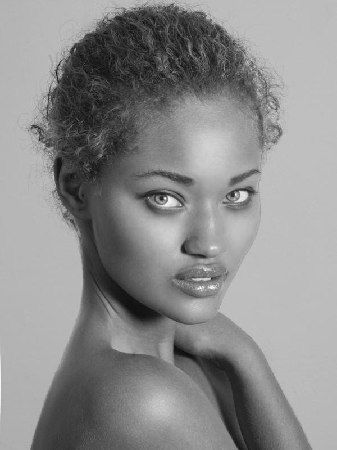

In [13]:

## Reconstruct Faces

# Initialize variables
last_file_path = None

# Iterate over the files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg"):
        last_file_path = os.path.join(folder_path, filename)

# Check if a JPG file was found
if last_file_path is not None:
    # Open the image using PIL
    image = Image.open(last_file_path)

    # Resize the image to the specified dimensions
    new_width = 128
    new_height = 128
    resized_image = image.resize((new_width, new_height))

    # Convert the resized image to grayscale
    grayscale_image = resized_image.convert('L')

    # Convert the grayscale image to a NumPy array
    last_image_array = np.array(grayscale_image)

    # Perform SVD analysis on the image array
    # ... (your SVD code here)

    # Display the original image
    image.show()

else:
    print("No JPG files found in the folder.")

In [21]:

## Print array of the last_image
print(last_image_array)
print(avgFace)

[[178 178 178 ... 189 189 189]
 [180 180 180 ... 187 187 187]
 [179 179 179 ... 187 189 189]
 ...
 [172 174 173 ... 181 181 181]
 [171 171 172 ... 181 181 181]
 [173 172 172 ... 179 179 179]]
0        141.448980
1        140.265306
2        138.326531
3        137.612245
4        136.510204
            ...    
16379    112.428571
16380    114.816327
16381    116.163265
16382    118.489796
16383    119.836735
Length: 16384, dtype: float64


In [33]:
# Reshape the average face into a 2D array, assuming it has shape (height, width)

avgFace_array = avgFace.values

avgFace_2D = avgFace_array.reshape(128, 128)

In [15]:

# Assuming you already have last_image_array and avgFace

# Convert the last image array to a transposed vector
last_image_vector = last_image_array.flatten().reshape(1, -1)

# Transpose the vector to shape (16348, 1)
testFaceMs_transposed = np.transpose(last_image_vector)

# Print the transposed vector
testFace = testFaceMs_transposed.flatten()
print(testFaceMs_transposed)
print(testFace)


[[178]
 [178]
 [178]
 ...
 [179]
 [179]
 [179]]
[178 178 178 ... 179 179 179]


In [16]:
# Subtract the last_image_vector from avgFace_vector
testFaceMs = testFace - avgFace
print(testFaceMs)

0        36.551020
1        37.734694
2        39.673469
3        41.387755
4        42.489796
           ...    
16379    67.571429
16380    65.183673
16381    62.836735
16382    60.510204
16383    59.163265
Length: 16384, dtype: float64


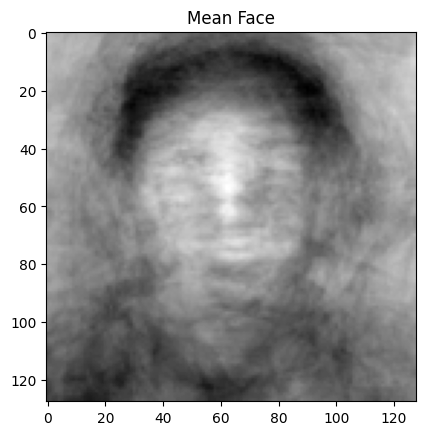

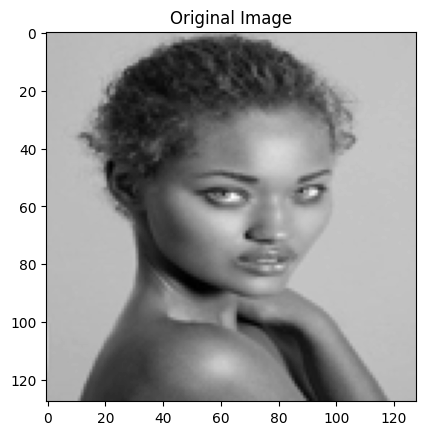

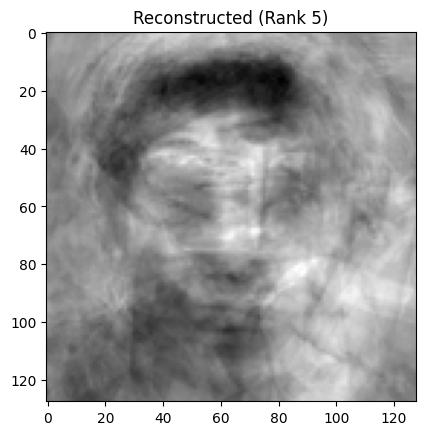

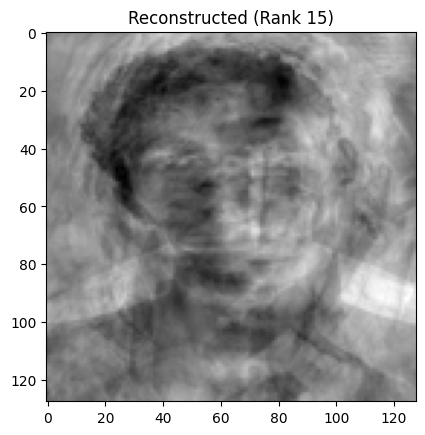

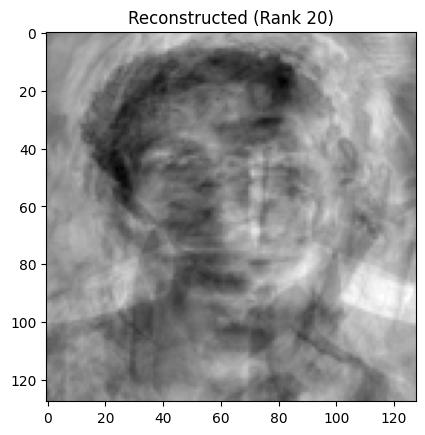

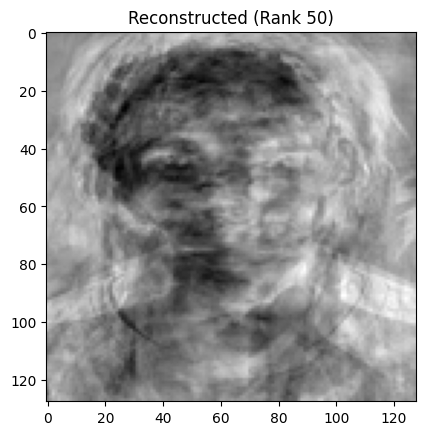

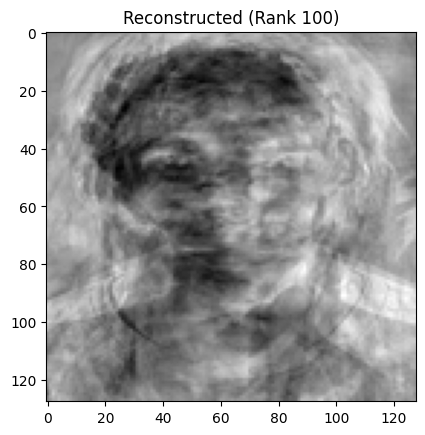

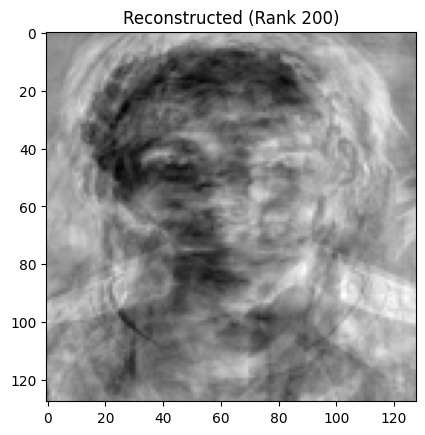

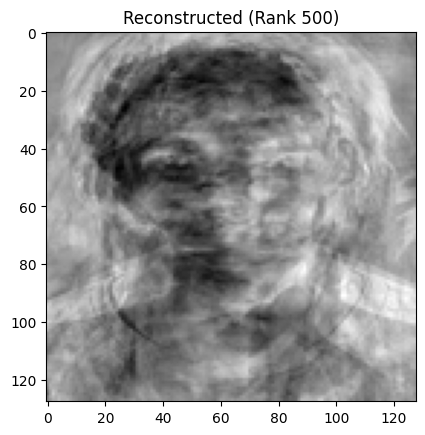

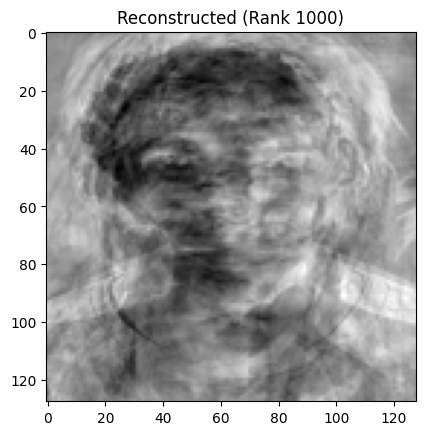

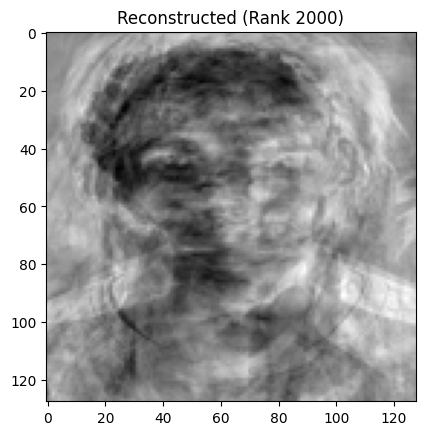

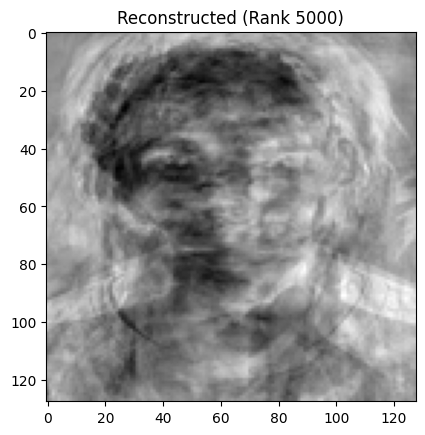

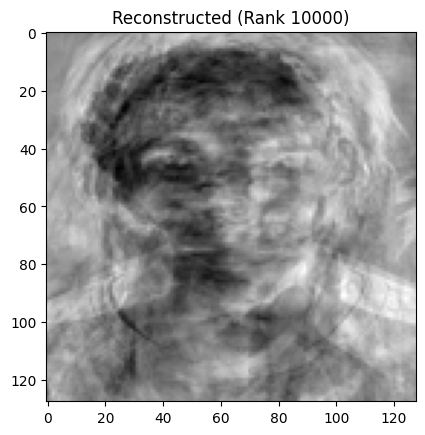

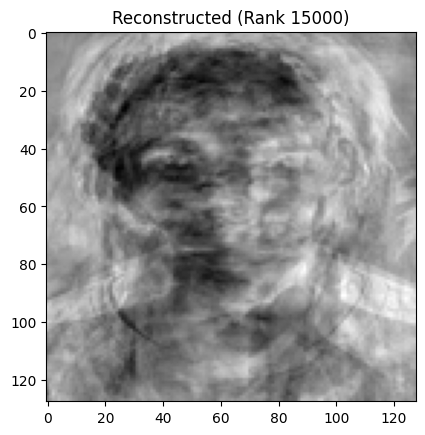

In [37]:

import matplotlib.pyplot as plt


# Display the original image
plt.imshow(avgFace_2D, cmap='gray')
plt.title('Mean Face')
plt.show()

# Display the original image
plt.imshow(last_image_array, cmap='gray')
plt.title('Original Image')
plt.show()


# Initialize the rank matrix
r_list = [5, 15, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000, 15000]

# Iterate over the ranks and reconstruct the faces
for r in r_list:
    # Reconstruct the face of person 41 using a reduced number of eigenfaces
    
    # Convert avgFace to a NumPy array
    avgFace_array = avgFace.values.reshape(-1, 1)

    # Convert testFaceMs to a NumPy array
    testFace_array = testFaceMs.values.reshape(-1, 1)

    # Compute the reconstruction of face_person_41
    reconstructed_face_person = avgFace_array + U[:, :r] @ (U[:, :r].T @ (testFace_array - avgFace_array))

    # Reshape the reconstructed face
    reconstructed_face_person_reshaped = reconstructed_face_person.reshape(new_height, new_width)

    # Display the reconstructed face
    plt.imshow(reconstructed_face_person_reshaped, cmap='gray')
    plt.title(f'Reconstructed (Rank {r})')
    plt.show()
